
# Ergodicity in Random Matrices

## Generating circular ensembles

Circular random matrix ensembles, [circular ensembles](https://en.wikipedia.org/wiki/Circular_ensemble) can be generated as follows [berry13a, edelman05, mezzari07, haaken]

### Circular Unitary Ensemble (CUE)

Hermitian matrix $H \in \mathbb{R}^{NxN}$, in component form

$H_{ij} = \frac{1}{2}(a_{ij}+ib_{ij}+a_{ji}-ib_{ji})$

$1 \leq i,j \leq N$

$\mathbb{G}$ i.i.d. Gaussian random numbers sampled from normal distribution.

$a_{ij}, b_{ij}, a_{ji}, b_{ji} \in \mathbb{G}$

Equivalent matrix definition:
$ H = \frac{1}{2}(A+iB+A^{T}-iB^{T})$

Circular Unitary Ensemble (CUE)

$H_{ij}^{CUE} = exp(\gamma_{i}i) * v_{j}^{i}$

$v_{i}$ is the $i$-th eigenvector, where $\gamma_{i} \in [0, 2\pi]$, uniform random number.

Equivalent matrix definition,

$\Gamma \in \mathbb{C}^N$ is a uniform random phase drawn from the interval $[0, 2\pi]$.

$H^{CUE} = \Gamma V$

where $V \in \mathbb{C}^{NxN}$ eigenvector matrix.

### Circular Orthogonal Ensemble (COE)

$H^{COE} = (H^{CUE})^T H^{CUE}$


### Circular Symplectic Ensemble (CSE)

$H^{CSE} = (Z_{\pm} (H^{CUE})^{T} Z_{\pm}) H^{CUE} $

$H^{CSE} \in \mathbb{C}^{2Nx2N}$

Define unit symplectic matrix, Z,  outer product of $NxN$ identity matrix with the unit antisymmetric $2x2$ matrix, doubly degenerate

$Z_{\pm} \in  \mathbb{R}^{2Nx2N}$



$ 
Z_{+} =\left( \begin{array}{ccccccc} 0 & -1 & & & & &  \\ 1 & 0 &  & & & & \\ & & 0 & -1 &  & &  \\ & & 1 & 0  & & & \\ & & & & \ddots & & \\ & & & & & 0& -1\\ & & & & & 1 & 0 \end{array} \right) 
$

$
Z_{-} = \left( \begin{array}{ccccccc} 0 & 1 & & & & &  \\ -1 & 0 &  & & & & \\ & & 0 & 1 &  & &  \\ & & -1 & 0  & & & \\ & & & & \ddots & & \\ & & & & & 0& 1\\ & & & & & -1 & 0 \end{array} \right)
$

#### Spectral Density & Approach to Ergodicity (see Manuscript)

`data_<ensembl_name>` are dictionaries of dictionary
keys are : ['N64', 'N128', 'N256', 'N512', 'N768', 'N1024']
values are dictionaries with keys: ['local_seeds', 'matrix_size', 'number_of_matrices', 'c_eigen']

In [57]:
import pickle
import os
os.getcwd()
fp       = open("./gen_data/data_cue.obj", "rb") 
data_cue = pickle.load(fp)
fp.close()
fp       = open("./gen_data/data_coe.obj", "rb") 
data_coe = pickle.load(fp)
fp.close()
fp       = open("./gen_data/data_cse.obj", "rb") 
data_cse = pickle.load(fp)
fp.close()

In [58]:
cue_eigen = data_cue['N64']['c_eigen'][0:63] # Initial set
coe_eigen = data_coe['N64']['c_eigen'][0:630] 
cse_eigen = data_cse['N64']['c_eigen'][0:1260]
import numpy as np
x_cue=np.real(cue_eigen); x_coe=np.real(coe_eigen); x_cse=np.real(cse_eigen); 
y_cue=np.imag(cue_eigen); y_coe=np.imag(coe_eigen); y_cse=np.imag(cse_eigen);

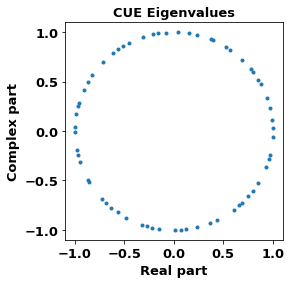

In [59]:
%matplotlib inline
import matplotlib.pylab as plt
font = {
        'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13,
       }

plt.rc('font', **font)
plt.plot(x_cue, y_cue, '.')
plt.ylabel("Complex part",**font)
plt.xlabel("Real part",**font)
plt.title("CUE Eigenvalues", **font)
plt.axes().set_aspect('equal')
plt.savefig('cue_eigen64.eps', format='eps', dpi=1000, bbox_inches='tight')

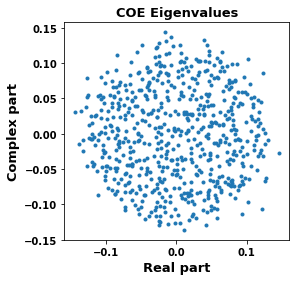

In [60]:
%matplotlib inline
import matplotlib.pylab as plt
plt.plot(x_coe,y_coe,'.')
plt.rc('font', **font)
plt.ylabel("Complex part",**font)
plt.xlabel("Real part",**font)
plt.title("COE Eigenvalues", **font)
plt.axes().set_aspect('equal')
plt.savefig('coe_eigen64.eps', format='eps', dpi=1000, bbox_inches='tight')

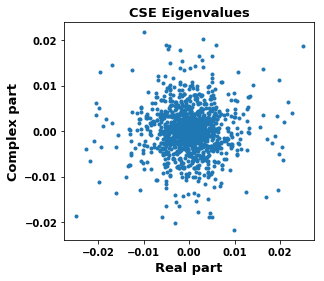

In [61]:
%matplotlib inline
import matplotlib.pylab as plt
plt.plot(x_cse,y_cse,'.')
plt.rc('font', **font)
plt.ylabel("Complex part",**font)
plt.xlabel("Real part",**font)
plt.title("CSE Eigenvalues", **font)
plt.axes().set_aspect('equal')
plt.savefig('cse_eigen64.eps', format='eps', dpi=1000, bbox_inches='tight')

In [51]:
import numpy as np

def spectral_density(c_eigen, ensemble_size, N, delta_rad=0.2):
    """
    
    Compute spectral density 
    
    Author: M.Suzen
    
    Given set of eigenvalues e_i, compute histogram of 
    Angle(e_i) from -Pi to Pi at a given spacing.
    
    Input
    c_eigen        set of eigenvalues as an np array.
    ensemble_size  number of ensembles used, this is used to scale the resulting spectrum.
    delta_rad      spacing to use in getting the density, defaults to 0.2 radians.
    
    Output
    A density in two dimensional numpy array, with bin centres in the first column 
    and the density in the second column.
    
    """
    b_ks         = np.arange(-np.pi,np.pi, delta_rad) # bin edges
    b_ks_centres = b_ks[1:]-delta_rad/2.0             # bin centres
    rho_ensemble = np.histogram(np.angle(c_eigen), bins=b_ks)
    return(np.column_stack((b_ks_centres, rho_ensemble[0]/float(ensemble_size))))


def thirumalai_mountain_rmsd(c_eigen, ensemble_size, N, delta_rad=0.2):
    """
    
    Compute TM metric for given set of eigenvalues e_i.
    
    Author: M.Suzen
    
    Input
    c_eigen        set of eigenvalues as an np array.
    ensemble_size  number of ensembles used, this is used to scale the resulting spectrum.
    N              matrix size used to generate eigenvalues.
    delta_rad      spacing to use in getting the density, defaults to 0.2 radians.
    
    Output
    Omega, TM metric 1d numpy array.
    
    """
    sden_ensemble = spectral_density(c_eigen, ensemble_size, N, delta_rad)
    omega         = np.zeros(sden_ensemble.shape[0])
    for i in range(ensemble_size):
        ix        = np.arange(0,N)+N*0
        sden_spec = spectral_density(c_eigen[ix], 1, N, delta_rad)
        omega     = np.power((sden_spec[:,1]-sden_ensemble[:,1]),2)+omega
    omega = omega/ensemble_size/N
    return(omega) # approach to spectral ergodicity  


def kl_distance_symmetric(Nk, Nk_minus, shift=1e-9):
    """
    
    Compute Kullback-Leibler Divergence in two directions. 
    
    Author: M.Suzen
    
    Input:
    Nk, Nk_minus     Two 1D numpy arrays 
    shift            epsilon shift distribution upwards, to avoid for zeros, defaults to 1e-9. 
    
    Output:
    Distance from KL divergence, floating number.
    
    """
    KL_k       = np.sum(Nk * np.log2((Nk+shift)/(Nk_minus+shift)))
    KL_k_minus = np.sum(Nk_minus * np.log2((Nk_minus+shift)/(Nk+shift)))
    return((KL_k+KL_k_minus))


def approach_se(Ns, ensemble_size, delta_rad, data_c):
    """
     
     Approach to ergodicity Consecutive 
     
    """
    Dse=[]
    for i in range(1,len(Ns)):
        c_eigen       = data_c['N' + str(Ns[i])]['c_eigen'] # All eigenvalues
        Nk = thirumalai_mountain_rmsd(c_eigen, ensemble_size, Ns[i], delta_rad)
        c_eigen       = data_c['N' + str(Ns[i-1])]['c_eigen'] # All eigenvalues
        Nk_minus = thirumalai_mountain_rmsd(c_eigen, ensemble_size, Ns[i-1], delta_rad)
        Dse.append(kl_distance_symmetric(Nk, Nk_minus))
    return(Dse)

In [52]:
ensemble_size = 40 
Ns            = [64,128,256,512,768,1024]
delta_rad     = 1e-4
data_c        = data_cue
D_se_cue = approach_se(Ns, ensemble_size, delta_rad, data_c)
data_c        = data_coe
D_se_coe = approach_se(Ns, ensemble_size, delta_rad, data_c)
data_c        = data_cse
D_se_cse = approach_se(Ns, ensemble_size, delta_rad, data_c)

In [53]:
D_se_cue, D_se_coe, D_se_cse

([43.70043832126192,
  40.939778569920975,
  35.472455484856631,
  32.703991628306433,
  29.459559484705267],
 [42.880422714099922,
  40.346699112947178,
  36.28669240194651,
  33.176893673286088,
  29.65229297067286],
 [41.977752463990207,
  39.125185027715162,
  32.24828998195197,
  27.569535282276959,
  24.471181129780085])

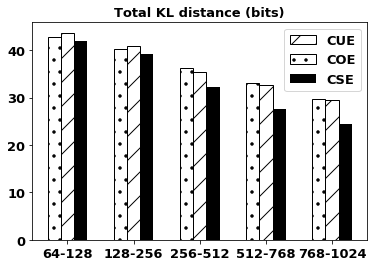

In [56]:
%matplotlib inline
import matplotlib.pylab as plt
font = {
        'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13,
}

plt.rc('font', **font)
plt.title("Total KL distance (bits)",**font)
ax     = plt.subplot(111)
x      = np.arange(1,6)
labels = ['64-128', '128-256', '256-512', '512-768', '768-1024']
r1=ax.bar(x, D_se_cue,width=0.2,fill=False,align='center', hatch='/', label='CUE')
r2=ax.bar(x-0.2, D_se_coe,width=0.2,fill=False,align='center',hatch='.')
r3=ax.bar(x+0.2, D_se_cse,width=0.2,color='black',align='center')
plt.xticks(x, labels)
ax.legend( (r1[0], r2[0], r3[0]), ('CUE', 'COE', 'CSE') )
plt.savefig('total_KL.eps', format='eps', dpi=1000, bbox_inches='tight')

In [41]:
# CUE: Spectral plots  (not used in the manuscript)
ensemble_size = 40 
Ns            = [64,128,256,512,768,1024]
delta_rad     = 1e-1
N             = 512
c_eigen       = data_cue['N' + str(N)]['c_eigen']
omega_cue_512 = thirumalai_mountain_rmsd(c_eigen, ensemble_size, N, delta_rad=delta_rad)
N             = 768
c_eigen       = data_cue['N' + str(N)]['c_eigen']
omega_cue_768 = thirumalai_mountain_rmsd(c_eigen, ensemble_size, N, delta_rad=delta_rad)
N             = 1024
c_eigen       = data_cue['N' + str(N)]['c_eigen']
omega_cue_1024 = thirumalai_mountain_rmsd(c_eigen, ensemble_size, N, delta_rad=delta_rad)

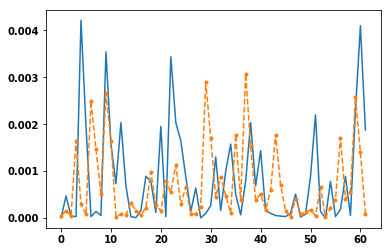

In [47]:
%matplotlib inline
import matplotlib.pylab as plt
plt.plot(omega_cue_768, '-')
plt.plot(omega_cue_1024, '.--')

### References
[berry13a] New Journal of Physics 15 (2013) 013026